Importarea librariilor necesare

In [874]:
import os
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
import numpy as np

Incarcare dataset, prezentare dataset

In [875]:
input_file = "drug200.csv"


# comma delimited is the default
#read_csv method - Read a comma-separated values (csv) file into DataFrame.
data = pd.read_csv(input_file, header = 0)

In [876]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [877]:
data.shape
#dimensiunea datelor

(200, 6)

In [878]:
data.columns
#coloanele

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [879]:
data.head()
#returns top n rows of a DataFrame or Series where n is a user input value

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [880]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

Data exploration

In [881]:
data['Sex']

0      F
1      M
2      M
3      F
4      F
      ..
195    F
196    M
197    M
198    M
199    F
Name: Sex, Length: 200, dtype: object

In [882]:
#Cate peroane sunt de sex feminin respectiv masculin
data.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [883]:
#Cum este impartit blood pressure-ul in dataset
data.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [884]:
data.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

Distributia datelor in dataset reprezentata ca plot-uri

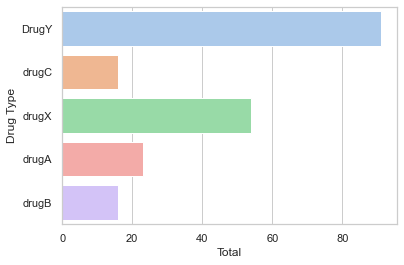

In [885]:
# Tipul de medicament folosit
sns.set_theme(style="whitegrid")
sns.countplot(y="Drug", data=data, palette="pastel")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

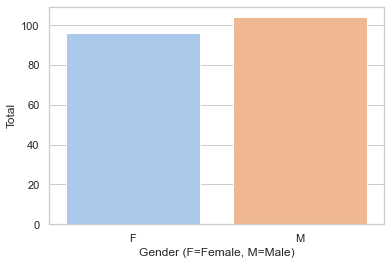

In [886]:
# Sexul distribuit in dataset
sns.set_theme(style="whitegrid")
sns.countplot(x="Sex", data=data, palette="pastel")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

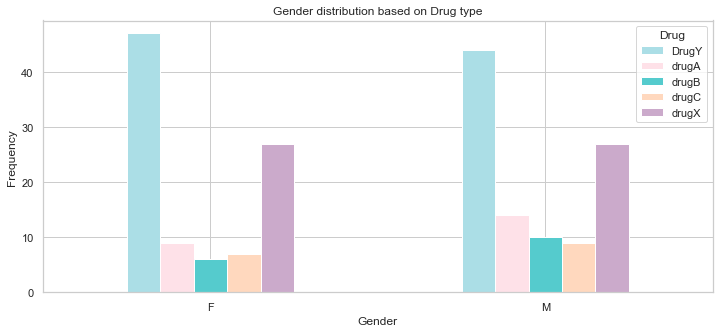

In [887]:
# Distributia sexului in functie de edicamentul administrat
pd.crosstab(data.Sex,data.Drug).plot(kind="bar",figsize=(12,5),color=['#ABDEE6','#FEE1E8','#55CBCD','#FFD8BE','#CBAACB'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

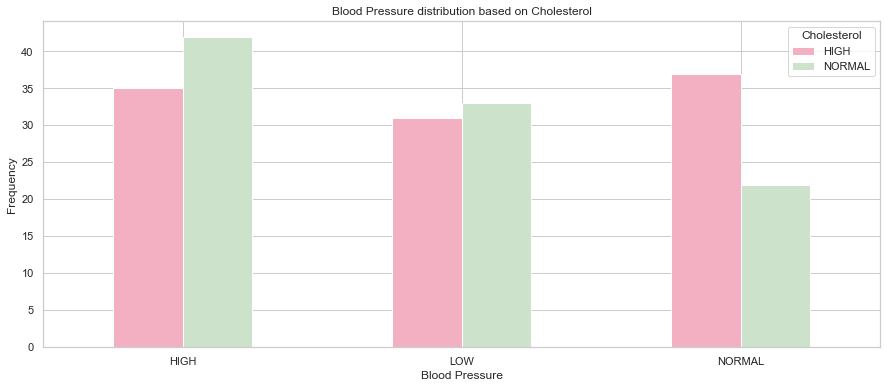

In [888]:
# Tensiunea in functie de nivelul de colesterol
pd.crosstab(data.BP,data.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#F3B0C3','#CCE2CB'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

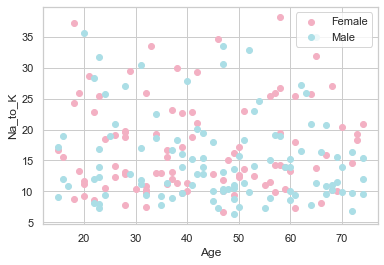

In [889]:
# Distributia sodiului si a potasiului in functie de sex 
plt.scatter(x=data.Age[data.Sex=='F'], y=data.Na_to_K[(data.Sex=='F')], c="#F3B0C3")
plt.scatter(x=data.Age[data.Sex=='M'], y=data.Na_to_K[(data.Sex=='M')], c="#ABDEE6")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

Preprocesare: one hot encoder, label encoder

In [890]:
#ONE HOT ENCODER
df_1=pd.get_dummies(data=data,columns=["BP","Cholesterol",'Sex'],drop_first=True)

In [891]:
df_1.head()

,Age,Na_to_K,Drug,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Sex_M
0,23,25.355,DrugY,0,0,0,0
1,47,13.093,drugC,1,0,0,1
2,47,10.114,drugC,1,0,0,1
3,28,7.798,drugX,0,1,0,0
4,61,18.043,DrugY,1,0,0,0


In [892]:
#Label encoder
c1='Drug'
label_encoder = LabelEncoder() 
df_1[c1]= label_encoder.fit_transform(df_1[c1]) 
df_1[c1].unique()
df_1

,Age,Na_to_K,Drug,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Sex_M
0,23,25.355,0,0,0,0,0
1,47,13.093,3,1,0,0,1
2,47,10.114,3,1,0,0,1
3,28,7.798,4,0,1,0,0
4,61,18.043,0,1,0,0,0
...,...,...,...,...,...,...,...
195,56,11.567,3,1,0,0,0
196,16,12.006,3,1,0,0,1
197,52,9.894,4,0,1,0,1
198,23,14.020,4,0,1,1,1


Impartirea datelor in train si test

In [893]:
# Split data into training and test
X = df_1.drop(['Drug','Age'],axis = 1)
y = df_1['Drug']

In [894]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [895]:
X_train.shape

(134, 5)

In [896]:
y_train.shape

(134,)

In [897]:
X_test.shape

(66, 5)

In [898]:
y_test.shape

(66,)

KNN -Nr of neighbors:15

In [899]:
#aplicare algoritm KNN pe dataset cu  numarul de vecini 15
KNN_15 = KNeighborsClassifier(n_neighbors=15)
KNN_15

KNeighborsClassifier(n_neighbors=15)

In [900]:
KNN_15.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [901]:
print(X_train)
print(y_train)

     Na_to_K  BP_LOW  BP_NORMAL  Cholesterol_NORMAL  Sex_M
42    15.790       0          1                   1      1
189   20.932       0          0                   1      1
90    16.594       0          1                   0      1
136   10.977       0          0                   0      0
51    10.898       0          1                   1      1
..       ...     ...        ...                 ...    ...
106   11.953       0          1                   0      1
14    12.703       0          1                   0      0
92    29.450       0          0                   0      0
179   15.891       0          1                   0      0
102   13.127       1          0                   0      0

[134 rows x 5 columns]
42     0
189    0
90     0
136    2
51     4
      ..
106    4
14     4
92     0
179    0
102    3
Name: Drug, Length: 134, dtype: int32


Prediction

In [902]:
# PREDICTION
pred = KNN_15.predict(X_test)

In [903]:
pred

array([4, 0, 4, 3, 0, 0, 0, 4, 1, 4, 1, 1, 0, 2, 1, 0, 1, 4, 4, 0, 4, 4,
       4, 0, 0, 0, 4, 4, 0, 4, 0, 4, 2, 0, 4, 0, 4, 1, 0, 1, 1, 4, 4, 0,
       0, 3, 0, 0, 0, 4, 4, 0, 4, 0, 4, 0, 4, 0, 0, 0, 1, 0, 1, 0, 4, 0])

In [904]:
# compare the result of predtree with y_test set
print(pred[0:5])
print(y_test[0:5])

[4 0 4 3 0]
95     4
15     0
30     4
158    3
128    0
Name: Drug, dtype: int32


In [905]:
KNN_15.predict_proba(X_test)

array([[0.        , 0.26666667, 0.13333333, 0.26666667, 0.33333333],
       [0.86666667, 0.        , 0.06666667, 0.        , 0.06666667],
       [0.        , 0.13333333, 0.2       , 0.        , 0.66666667],
       [0.        , 0.13333333, 0.2       , 0.33333333, 0.33333333],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.2       , 0.06666667, 0.13333333, 0.6       ],
       [0.        , 0.33333333, 0.26666667, 0.06666667, 0.33333333],
       [0.        , 0.13333333, 0.06666667, 0.        , 0.8       ],
       [0.        , 0.26666667, 0.26666667, 0.2       , 0.26666667],
       [0.        , 0.33333333, 0.13333333, 0.2       , 0.33333333],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.26666667, 0.33333333, 0.13333333, 0.26666667],
       [0.        , 0.33333333, 0.

In [906]:
 #Return the mean accuracy on the given test data and labels
print("Accuracy score for knn Classifier nr neighb=15:")
print(KNN_15.score(X,y))



Accuracy score for knn Classifier nr neighb=15:
0.815


METRICS: confusion metrics, f1_score, recall_score, precison_score, accuracy score, classficiation report

<AxesSubplot:>

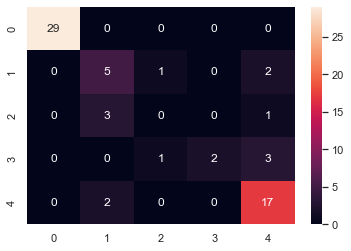

In [907]:
#METRICA 1- confusion matrix
sns.heatmap(confusion_matrix(y_test, pred),annot=True)


In [908]:

#METRICA 2- f1_score
#F1 = 2 * (precision * recall) / (precision + recall)
print("F1 score for KNN_15 is:")
k15_f1 = f1_score(y_test, pred, average='macro')
k15_f1


F1 score for KNN_15 is:


0.573015873015873

In [909]:
#METRICA 3-recall_score
k15_recall = recall_score(y_test,pred,average=None)
k15_recall

array([1.        , 0.625     , 0.        , 0.33333333, 0.89473684])

In [910]:
#METRICA 4- accuracy score:this function computes subset accuracy: the set of labels predicted for a sample 
# must exactly match the corresponding set of labels in y_test.
k15_acc = accuracy_score(y_test,pred)
k15_acc

0.803030303030303

In [911]:

#METRICA 5- Precision
#Precision explains how many of the correctly predicted cases actually turned out to be positive
print(precision_score(y_test, pred, average=None))
k15_precision = precision_score(y_test, pred, average=None)

[1.         0.5        0.         1.         0.73913043]


Classification report: KNN_15

In [912]:
#classification_report:Build a text report showing the main classification metrics.
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.50      0.62      0.56         8
           2       0.00      0.00      0.00         4
           3       1.00      0.33      0.50         6
           4       0.74      0.89      0.81        19

    accuracy                           0.80        66
   macro avg       0.65      0.57      0.57        66
weighted avg       0.80      0.80      0.79        66



KNN -Nr of neighbors:10

In [913]:
X = df_1.drop(['Drug','Age'],axis = 1)
y = df_1['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [914]:

KNN_10 = KNeighborsClassifier(n_neighbors=10)
KNN_10



KNeighborsClassifier(n_neighbors=10)

In [915]:
KNN_10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [916]:
X_train

,Na_to_K,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Sex_M
42,15.790,0,1,1,1
189,20.932,0,0,1,1
90,16.594,0,1,0,1
136,10.977,0,0,0,0
51,10.898,0,1,1,1
...,...,...,...,...,...
106,11.953,0,1,0,1
14,12.703,0,1,0,0
92,29.450,0,0,0,0
179,15.891,0,1,0,0


In [917]:
y_train

42     0
189    0
90     0
136    2
51     4
      ..
106    4
14     4
92     0
179    0
102    3
Name: Drug, Length: 134, dtype: int32

In [918]:
pred2 = KNN_10.predict(X_test)

In [919]:
pred2

array([1, 0, 4, 3, 0, 0, 0, 4, 1, 4, 2, 4, 0, 2, 1, 0, 1, 4, 3, 0, 1, 1,
       4, 0, 0, 0, 3, 4, 0, 4, 0, 4, 2, 0, 4, 0, 4, 1, 0, 1, 4, 4, 4, 0,
       0, 3, 0, 0, 0, 2, 4, 0, 4, 0, 4, 0, 4, 0, 0, 0, 1, 0, 1, 0, 4, 0])

In [920]:
# compare the result of predtree with y_test set
print(pred2[0:5])
print(y_test[0:5])

[1 0 4 3 0]
95     4
15     0
30     4
158    3
128    0
Name: Drug, dtype: int32


In [921]:
KNN_10.predict_proba(X_test)

array([[0. , 0.3, 0.1, 0.3, 0.3],
       [0.8, 0. , 0.1, 0. , 0.1],
       [0. , 0.1, 0.2, 0. , 0.7],
       [0. , 0.2, 0.1, 0.5, 0.2],
       [1. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0.1, 0. , 0.7],
       [0. , 0.4, 0.1, 0.1, 0.4],
       [0. , 0. , 0.1, 0. , 0.9],
       [0. , 0.3, 0.4, 0.2, 0.1],
       [0. , 0.3, 0.1, 0.2, 0.4],
       [1. , 0. , 0. , 0. , 0. ],
       [0. , 0.3, 0.4, 0.1, 0.2],
       [0. , 0.5, 0.2, 0.2, 0.1],
       [1. , 0. , 0. , 0. , 0. ],
       [0. , 0.6, 0.2, 0. , 0.2],
       [0. , 0.2, 0.1, 0.1, 0.6],
       [0. , 0.2, 0.2, 0.3, 0.3],
       [1. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0.1, 0. , 0.4],
       [0. , 0.3, 0.1, 0.3, 0.3],
       [0. , 0.2, 0.1, 0.2, 0.5],
       [1. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. ],
       [0. , 0.1, 0.3, 0.4, 0.2],
       [0. , 0.3, 0.2, 0. , 0.5],
       [1. , 0. , 0. , 0. , 0. ],
       [0. , 0

In [922]:
print("Accuracy score for knn Classifier nr neighb=10:")
print(KNN_10.score(X,y))


Accuracy score for knn Classifier nr neighb=10:
0.83


<AxesSubplot:>

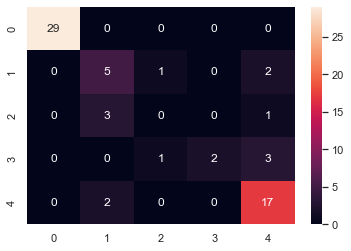

In [923]:
#METRICA 1- confusion matrix
sns.heatmap(confusion_matrix(y_test, pred),annot=True)


In [924]:
#METRICA 2- f1_score
#F1 = 2 * (precision * recall) / (precision + recall)
print("F1 score for KNN_15 is:")
k10_f1 = f1_score(y_test, pred, average='macro')
k10_f1


F1 score for KNN_15 is:


0.573015873015873

In [925]:
#METRICA 3-recall_score
k10_recall = recall_score(y_test,pred,average=None)
k10_recall


array([1.        , 0.625     , 0.        , 0.33333333, 0.89473684])

In [926]:
#METRICA 4- accuracy score:this function computes subset accuracy: the set of labels predicted for a sample 
# must exactly match the corresponding set of labels in y_test.
k10_acc = accuracy_score(y_test,pred)


In [927]:
#METRICA 5- Precision
#Precision explains how many of the correctly predicted cases actually turned out to be positive
print(precision_score(y_test, pred, average=None))
k10_precision = precision_score(y_test, pred, average=None)


[1.         0.5        0.         1.         0.73913043]


In [928]:
#classification_report:Build a text report showing the main classification metrics.
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.50      0.62      0.56         8
           2       0.00      0.00      0.00         4
           3       1.00      0.33      0.50         6
           4       0.74      0.89      0.81        19

    accuracy                           0.80        66
   macro avg       0.65      0.57      0.57        66
weighted avg       0.80      0.80      0.79        66



KNN -Nr of neighbors:5

In [929]:


KNN_5 = KNeighborsClassifier(n_neighbors=5)
KNN_5


KNeighborsClassifier()

In [930]:
KNN_5.fit(X_train, y_train)

KNeighborsClassifier()

In [931]:
X_train

,Na_to_K,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Sex_M
42,15.790,0,1,1,1
189,20.932,0,0,1,1
90,16.594,0,1,0,1
136,10.977,0,0,0,0
51,10.898,0,1,1,1
...,...,...,...,...,...
106,11.953,0,1,0,1
14,12.703,0,1,0,0
92,29.450,0,0,0,0
179,15.891,0,1,0,0


In [932]:
y_train

42     0
189    0
90     0
136    2
51     4
      ..
106    4
14     4
92     0
179    0
102    3
Name: Drug, Length: 134, dtype: int32

In [933]:
pred3 = KNN_5.predict(X_test)

In [934]:
pred3

array([4, 0, 4, 3, 0, 0, 0, 1, 1, 4, 1, 1, 0, 1, 1, 0, 1, 4, 3, 0, 4, 1,
       4, 0, 0, 0, 3, 1, 0, 4, 0, 1, 0, 0, 1, 0, 4, 1, 0, 2, 4, 4, 4, 0,
       0, 3, 0, 0, 0, 4, 4, 0, 4, 0, 4, 0, 1, 0, 0, 0, 2, 0, 1, 0, 4, 0])

In [935]:
print(pred3[0:5])
print(y_test[0:5])

[4 0 4 3 0]
95     4
15     0
30     4
158    3
128    0
Name: Drug, dtype: int32


In [936]:
KNN_5.predict_proba(X_test)

array([[0. , 0.2, 0.2, 0.2, 0.4],
       [0.6, 0. , 0.2, 0. , 0.2],
       [0. , 0. , 0.2, 0. , 0.8],
       [0. , 0. , 0.2, 0.8, 0. ],
       [1. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. ],
       [0. , 0.4, 0.2, 0. , 0.4],
       [0. , 0.6, 0. , 0. , 0.4],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0.4, 0.4, 0.2, 0. ],
       [0. , 0.4, 0. , 0.2, 0.4],
       [1. , 0. , 0. , 0. , 0. ],
       [0. , 0.4, 0.2, 0.2, 0.2],
       [0. , 0.6, 0.2, 0.2, 0. ],
       [1. , 0. , 0. , 0. , 0. ],
       [0. , 0.8, 0.2, 0. , 0. ],
       [0. , 0.2, 0. , 0. , 0.8],
       [0. , 0.2, 0.2, 0.6, 0. ],
       [1. , 0. , 0. , 0. , 0. ],
       [0. , 0.4, 0. , 0. , 0.6],
       [0. , 0.4, 0.2, 0. , 0.4],
       [0. , 0. , 0. , 0.4, 0.6],
       [1. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0.8, 0. ],
       [0. , 0.4, 0.2, 0. , 0.4],
       [1. , 0. , 0. , 0. , 0. ],
       [0. , 0

In [937]:
print("Accuracy score for knn Classifier nr neighb=10:")
print(KNN_5.score(X,y))

Accuracy score for knn Classifier nr neighb=10:
0.89


<AxesSubplot:>

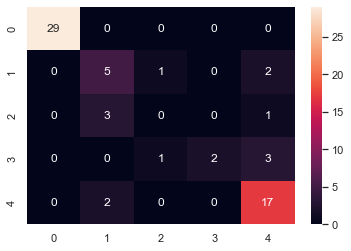

In [938]:
#METRICA 1- confusion matrix
sns.heatmap(confusion_matrix(y_test, pred),annot=True)

In [939]:
#METRICA 2- f1_score
#F1 = 2 * (precision * recall) / (precision + recall)
print("F1 score for KNN_15 is:")
k5_f1 = f1_score(y_test, pred, average='macro')
k5_f1

F1 score for KNN_15 is:


0.573015873015873

In [940]:
#METRICA 3-recall_score
k5_recall = recall_score(y_test,pred,average=None)
k5_recall

array([1.        , 0.625     , 0.        , 0.33333333, 0.89473684])

In [941]:
#METRICA 4- accuracy score:this function computes subset accuracy: the set of labels predicted for a sample 
# must exactly match the corresponding set of labels in y_test.
k5_acc = accuracy_score(y_test,pred)
k5_acc

0.803030303030303

In [942]:
#METRICA 5- Precision
#Precision explains how many of the correctly predicted cases actually turned out to be positive
print(precision_score(y_test, pred, average=None))
k5_precision = precision_score(y_test, pred, average=None)


[1.         0.5        0.         1.         0.73913043]


In [943]:
#classification_report:Build a text report showing the main classification metrics.
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.50      0.62      0.56         8
           2       0.00      0.00      0.00         4
           3       1.00      0.33      0.50         6
           4       0.74      0.89      0.81        19

    accuracy                           0.80        66
   macro avg       0.65      0.57      0.57        66
weighted avg       0.80      0.80      0.79        66



Finding max score for  KNeighborsClassifier

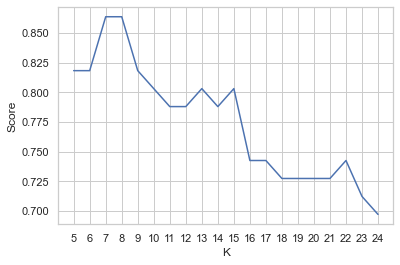

KNN Max Score 0.8636363636363636


In [944]:
scores = []
for i in range(5,25):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scores.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(5,25), scores)
plt.xticks(np.arange(5,25))
plt.xlabel("K")
plt.ylabel("Score")
plt.show()
maxK = max(scores)
print("KNN Max Score",maxK)

Radius Neighbors Classifier

In [945]:

RNK = RadiusNeighborsClassifier(radius = 5)
RNK.fit(X_train, y_train)


RadiusNeighborsClassifier(radius=5)

In [946]:
y_pred = RNK.predict(X_test)
y_pred

array([4, 0, 4, 4, 0, 0, 0, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 0, 4, 4,
       4, 0, 0, 0, 4, 4, 0, 4, 0, 4, 0, 0, 4, 0, 4, 4, 0, 4, 4, 4, 4, 0,
       0, 4, 0, 0, 0, 4, 4, 0, 4, 0, 4, 0, 4, 0, 0, 0, 4, 0, 4, 0, 4, 0])

In [947]:
y_test

95     4
15     0
30     4
158    3
128    0
      ..
97     0
31     2
12     0
35     4
119    0
Name: Drug, Length: 66, dtype: int32

In [948]:
print("Accuracy score for RADIUS CLASSIFIER:")
print(RNK.score(X,y))

Accuracy score for RADIUS CLASSIFIER:
0.71


Finding max score for RadiusNeighborsClassifier 

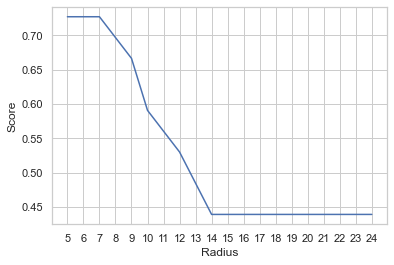

KNN Radius Max Score  0.7272727272727273


In [949]:
scores = []
for i in range(5,25):
    knnRadius = RadiusNeighborsClassifier(radius = i)
    knnRadius.fit(X_train, y_train)
    scores.append(knnRadius.score(X_test, y_test))
    
plt.plot(range(5,25), scores)
plt.xticks(np.arange(5,25))
plt.xlabel("Radius")
plt.ylabel("Score")
plt.show()
maxRadius = max(scores)
print("KNN Radius Max Score ",maxRadius)